In [108]:
import pandas as pd
df=pd.read_csv('misc/ETHEUR_5.csv', sep=',',header=None)
df.values

array([[1.43894550e+09, 2.00000000e+01, 2.00000000e+01, ...,
        2.00000000e+01, 4.98000000e+00, 2.00000000e+00],
       [1.43894580e+09, 2.00000000e+01, 2.00000000e+01, ...,
        2.00000000e+01, 3.37215150e+00, 1.00000000e+00],
       [1.43894670e+09, 2.50100000e+00, 2.50100000e+00, ...,
        2.12000000e+00, 4.04760000e+01, 5.00000000e+00],
       ...,
       [1.63304550e+09, 2.59912000e+03, 2.60118000e+03, ...,
        2.60078000e+03, 1.07873670e+00, 1.30000000e+01],
       [1.63304580e+09, 2.59650000e+03, 2.59731000e+03, ...,
        2.59641000e+03, 1.41332579e+00, 4.00000000e+00],
       [1.63304610e+09, 2.59176000e+03, 2.59402000e+03, ...,
        2.59220000e+03, 1.29625756e+00, 6.00000000e+00]])

In [109]:
df.columns = ['time_end', 'open', 'high', 'low', 'close', 'volume', 'trades']
df.drop("trades", axis=1, inplace=True)

In [110]:
from datetime import datetime
df["time_end"] = pd.to_datetime(df["time_end"], unit="s")
df = df.iloc[-20000:]
df

,time_end,open,high,low,close,volume
557194,2021-07-23 09:45:00,1748.39,1748.39,1740.31,1741.11,23.365560
557195,2021-07-23 09:50:00,1741.35,1744.22,1740.64,1742.57,10.734715
557196,2021-07-23 09:55:00,1742.58,1743.78,1741.77,1743.36,9.902993
557197,2021-07-23 10:00:00,1740.87,1744.51,1738.21,1739.77,195.878074
557198,2021-07-23 10:05:00,1739.48,1745.92,1739.48,1745.48,11.706068
...,...,...,...,...,...,...
577189,2021-09-30 23:35:00,2596.23,2598.69,2595.75,2598.21,2.517822
577190,2021-09-30 23:40:00,2594.95,2599.21,2594.30,2596.84,2.436784
577191,2021-09-30 23:45:00,2599.12,2601.18,2597.01,2600.78,1.078737
577192,2021-09-30 23:50:00,2596.50,2597.31,2595.46,2596.41,1.413326


In [111]:
import talib
from talib import MA_Type
df["RSI"] = talib.RSI(df["close"], timeperiod=11)
df["BBupper"], df["BBmiddle"], df["BBlower"] = talib.BBANDS(df["close"], timeperiod=12, nbdevup=2, nbdevdn=2, matype=MA_Type.T3)
df["percent_b"] = ((df["close"]-df["BBlower"])/(df["BBupper"] - df["BBlower"]))
df["MACD"], df["MACD_sig"], df["MACD_hist"] = talib.MACD(df["close"], fastperiod=12, slowperiod=26, signalperiod=9)
df.dropna(inplace=True)
savedf = df.copy()
df

,time_end,open,high,low,close,volume,RSI,BBupper,BBmiddle,BBlower,percent_b,MACD,MACD_sig,MACD_hist
557260,2021-07-23 16:45:00,1713.78,1719.41,1713.47,1717.83,77.504651,30.585140,1749.417610,1726.522409,1703.627208,0.310170,-9.999628,-7.994558,-2.005070
557261,2021-07-23 16:50:00,1716.65,1717.61,1713.92,1716.79,3.354146,29.601367,1742.164864,1723.631848,1705.098831,0.315415,-9.728914,-8.341429,-1.387485
557262,2021-07-23 16:55:00,1716.46,1716.46,1711.74,1713.62,13.729147,26.719755,1733.937974,1721.026002,1708.114030,0.213212,-9.658822,-8.604908,-1.053915
557263,2021-07-23 17:00:00,1711.84,1713.90,1709.96,1712.55,81.791546,25.787675,1727.695008,1718.691535,1709.688062,0.158935,-9.579191,-8.799764,-0.779427
557264,2021-07-23 17:05:00,1712.36,1712.74,1705.30,1705.30,28.703097,20.466464,1724.937404,1716.515827,1708.094250,-0.165898,-9.985986,-9.037009,-0.948977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577189,2021-09-30 23:35:00,2596.23,2598.69,2595.75,2598.21,2.517822,58.352402,2607.822324,2594.427001,2581.031679,0.641206,0.938938,1.076285,-0.137347
577190,2021-09-30 23:40:00,2594.95,2599.21,2594.30,2596.84,2.436784,56.590451,2606.632529,2594.002022,2581.371516,0.612346,1.296804,1.120389,0.176416
577191,2021-09-30 23:45:00,2599.12,2601.18,2597.01,2600.78,1.078737,60.375465,2607.215823,2593.835478,2580.455134,0.759505,1.876707,1.271652,0.605055
577192,2021-09-30 23:50:00,2596.50,2597.31,2595.46,2596.41,1.413326,54.570278,2607.216256,2593.864262,2580.512267,0.595332,1.961057,1.409533,0.551523


In [112]:
df = savedf.copy()

In [113]:
buy_times = df.index[(df['RSI'] < 30) & (df['percent_b'] < 0)]
df.loc[buy_times, "action"] = 1
sell_times = df.index[(df['RSI'] > 70) & (df['percent_b'] > 1)]
df.loc[sell_times, "action"] = -1
df['action'] = df['action'].fillna(0)

In [114]:
df

,time_end,open,high,low,close,volume,RSI,BBupper,BBmiddle,BBlower,percent_b,MACD,MACD_sig,MACD_hist,action
557260,2021-07-23 16:45:00,1713.78,1719.41,1713.47,1717.83,77.504651,30.585140,1749.417610,1726.522409,1703.627208,0.310170,-9.999628,-7.994558,-2.005070,0.0
557261,2021-07-23 16:50:00,1716.65,1717.61,1713.92,1716.79,3.354146,29.601367,1742.164864,1723.631848,1705.098831,0.315415,-9.728914,-8.341429,-1.387485,0.0
557262,2021-07-23 16:55:00,1716.46,1716.46,1711.74,1713.62,13.729147,26.719755,1733.937974,1721.026002,1708.114030,0.213212,-9.658822,-8.604908,-1.053915,0.0
557263,2021-07-23 17:00:00,1711.84,1713.90,1709.96,1712.55,81.791546,25.787675,1727.695008,1718.691535,1709.688062,0.158935,-9.579191,-8.799764,-0.779427,0.0
557264,2021-07-23 17:05:00,1712.36,1712.74,1705.30,1705.30,28.703097,20.466464,1724.937404,1716.515827,1708.094250,-0.165898,-9.985986,-9.037009,-0.948977,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577189,2021-09-30 23:35:00,2596.23,2598.69,2595.75,2598.21,2.517822,58.352402,2607.822324,2594.427001,2581.031679,0.641206,0.938938,1.076285,-0.137347,0.0
577190,2021-09-30 23:40:00,2594.95,2599.21,2594.30,2596.84,2.436784,56.590451,2606.632529,2594.002022,2581.371516,0.612346,1.296804,1.120389,0.176416,0.0
577191,2021-09-30 23:45:00,2599.12,2601.18,2597.01,2600.78,1.078737,60.375465,2607.215823,2593.835478,2580.455134,0.759505,1.876707,1.271652,0.605055,0.0
577192,2021-09-30 23:50:00,2596.50,2597.31,2595.46,2596.41,1.413326,54.570278,2607.216256,2593.864262,2580.512267,0.595332,1.961057,1.409533,0.551523,0.0


In [115]:
buy = df.loc[df["action"] == 1.0]
sell = df.loc[df["action"] == -1.0]

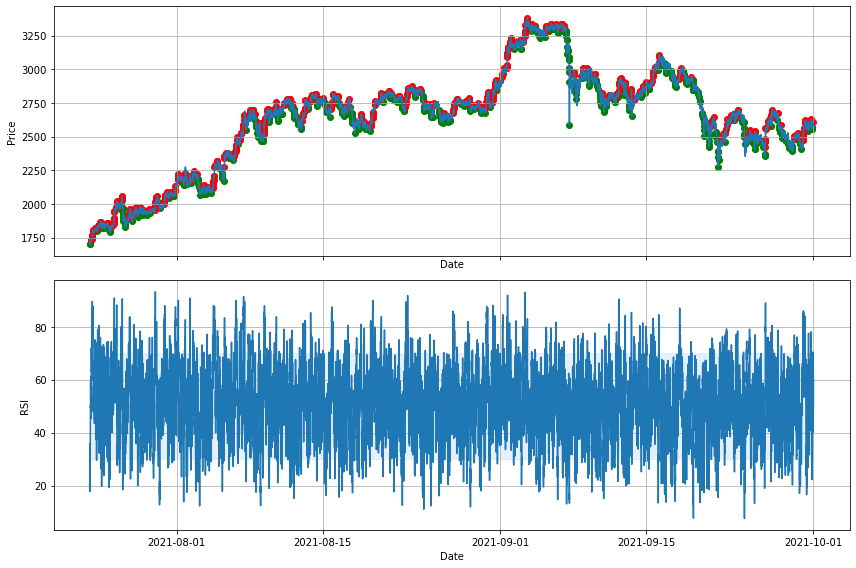

In [116]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
ax0.plot(df["time_end"], df['close'], label='Price')
ax0.set_xlabel('Date')
ax0.set_ylabel('Price')
ax0.grid()

for ind, item in buy.iterrows():
    ax0.scatter(x=item["time_end"], y=item["close"], color='green')
for ind, item in sell.iterrows():
    ax0.scatter(x=item["time_end"], y=item["close"], color='red')

ax1.plot(df['time_end'], df['RSI'], label='RSI')
ax1.fill_between(df['time_end'], y1=30, y2=70, color='#adccff', alpha=0.3)
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

fig.tight_layout()
plt.show()

In [117]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=df["time_end"],
                         y=df["close"]))

fig.add_trace(go.Scatter(x=buy["time_end"],
                        y=buy["close"],
                        mode='markers',
                         marker=dict(color="green")
                        ))
fig.add_trace(go.Scatter(x=sell["time_end"],
                        y=sell["close"],
                        mode='markers',
                         marker=dict(color="red")
                        ))
fig.update_layout(showlegend=False, 
                  xaxis_rangeslider_visible=True)